In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import month_name

In [81]:
data = pd.read_csv('../historic_appts_raw.csv')
data

/var/folders/0t/dc47jt692_qc1qb7bqkgylhw0000gn/T/ipykernel_65179/3848984864.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../historic_appts_raw.csv')


,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
0,10079786,52,27.45,NaN,0,1,1,2,0,0,...,0,0,NaN,0.0,0.264963,High Risk,First prediction,1.0,3,2024-03-20
1,10079786,52,39.45,NaN,1,0,0,2,0,0,...,0,0,NaN,0.0,0.197289,High Risk,Last prediction,1.0,3,2024-03-20
2,10164094,52,27.45,NaN,1,0,1,2,0,1,...,0,0,NaN,1.0,0.141745,Moderate Risk,Last prediction,1.0,3,2023-11-24
3,10164094,52,27.45,NaN,1,0,1,2,0,1,...,0,0,NaN,1.0,0.266140,High Risk,First prediction,1.0,3,2023-11-24
4,10211058,32,39.45,NaN,0,1,0,2,0,0,...,0,0,NaN,1.0,0.062844,Low Risk,First prediction,1.0,3,2024-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278794,13390142,17,27.45,NaN,1,0,1,3,0,0,...,0,0,NaN,1.0,0.223362,High Risk,Last prediction,1.0,3,2024-03-11
278795,13440971,77,21.70,NaN,0,1,1,2,0,0,...,0,0,NaN,1.0,0.163437,Moderate Risk,First prediction,1.0,3,2024-03-20
278796,13440971,77,21.70,NaN,0,1,1,2,0,0,...,0,0,NaN,1.0,0.080699,Low Risk,Last prediction,1.0,3,2024-03-20
278797,13463451,52,27.45,NaN,1,0,1,2,0,0,...,0,1,NaN,0.0,0.292078,High Risk,First prediction,1.0,3,2024-01-30


In [82]:
# Filter for First Prediction only
data = data[data['prediction_type'] == "First prediction"]
data

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
0,10079786,52,27.45,NaN,0,1,1,2,0,0,...,0,0,NaN,0.0,0.264963,High Risk,First prediction,1.0,3,2024-03-20
3,10164094,52,27.45,NaN,1,0,1,2,0,1,...,0,0,NaN,1.0,0.266140,High Risk,First prediction,1.0,3,2023-11-24
4,10211058,32,39.45,NaN,0,1,0,2,0,0,...,0,0,NaN,1.0,0.062844,Low Risk,First prediction,1.0,3,2024-01-19
6,10550310,72,39.45,NaN,1,0,1,4,0,0,...,0,0,NaN,0.0,0.040898,Low Risk,First prediction,1.0,3,2024-01-19
8,10670198,32,39.45,NaN,1,0,0,2,0,1,...,0,0,NaN,1.0,0.389798,High Risk,First prediction,1.0,3,2023-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278790,13147714,2,27.45,NaN,0,0,0,1,0,0,...,0,0,NaN,1.0,0.160467,Moderate Risk,First prediction,1.0,3,2023-12-29
278791,13257461,67,40.00,NaN,0,0,0,1,0,0,...,0,0,NaN,0.0,0.124008,Moderate Risk,First prediction,1.0,3,2024-02-01
278793,13390142,17,27.45,NaN,1,0,1,3,0,0,...,0,0,NaN,1.0,0.235887,High Risk,First prediction,1.0,3,2024-03-11
278795,13440971,77,21.70,NaN,0,1,1,2,0,0,...,0,0,NaN,1.0,0.163437,Moderate Risk,First prediction,1.0,3,2024-03-20


### Check missing data

In [83]:
# Check for missing values
data.isnull().sum()

appointment_id                               0
age_deid                                     0
bmi_deid                                     0
ethnicity                               139401
ethnic_category_black                        0
ethnic_category_unknown                      0
gender_male                                  0
imd19_quintile                               0
main_spoken_language_other                   0
current_smoker                               0
substance_misuse                             0
smoking_unknown                              0
referral_to_treatment_period_status     139401
tfc_name                                139399
patient_on_multiple_pathways            139401
appt_month                                 104
appt_hour                                  104
appt_duration                              104
hospital_service_display                   501
service_mapping                              0
reason_display                             104
appointment_t

### Categorical data

<Axes: xlabel='age_deid'>

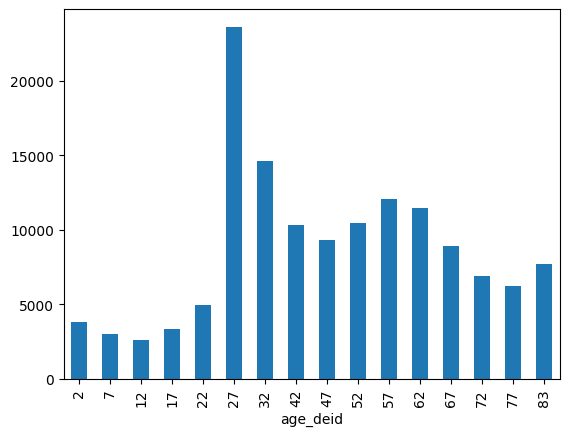

In [84]:
# Plot bar chart for age
data["age_deid"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='bmi_deid'>

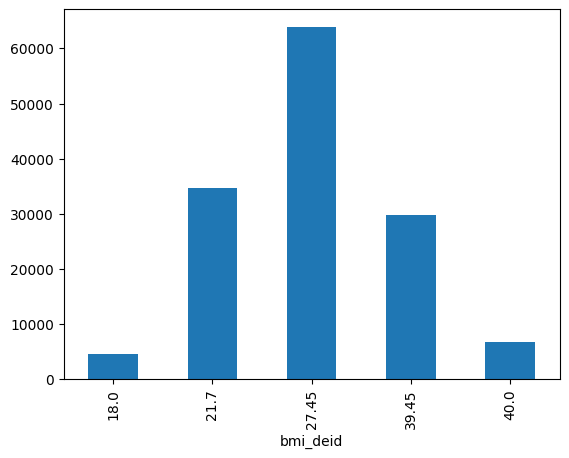

In [85]:
# Plot bar chart for BMI
data["bmi_deid"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='ethnic_category_unknown'>

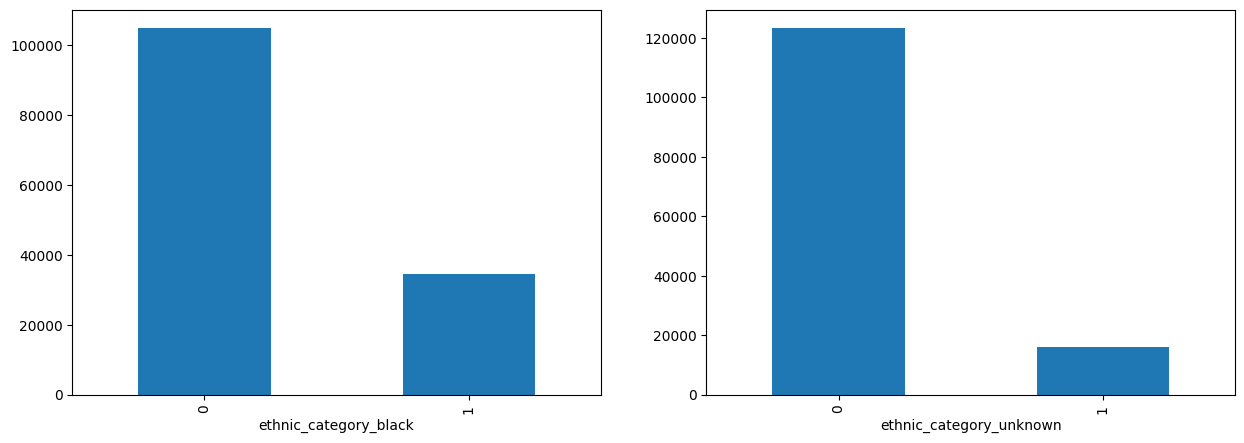

In [86]:
# Plot bar charts for ethnicity, ethnic_category_black, and ethnic_category_unknown
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data["ethnic_category_black"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["ethnic_category_unknown"].value_counts().sort_index().plot(kind='bar', ax=axes[1])

<Axes: xlabel='gender_male'>

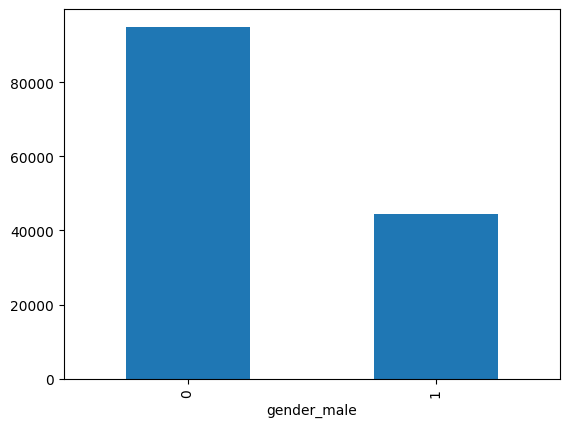

In [87]:
# Plot bar chart for gender_male
data["gender_male"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='imd19_quintile'>

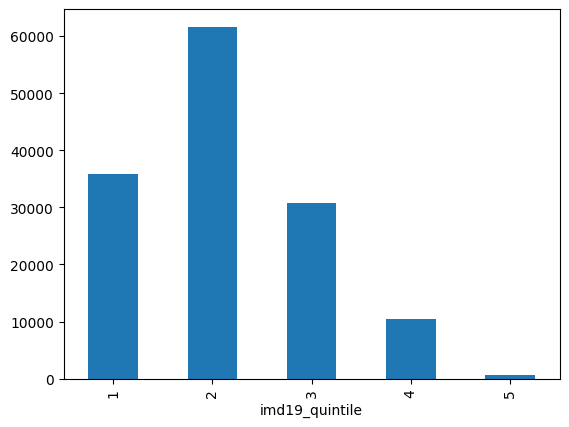

In [88]:
# Plot bar chart for imd19_quintile
data["imd19_quintile"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='main_spoken_language_other'>

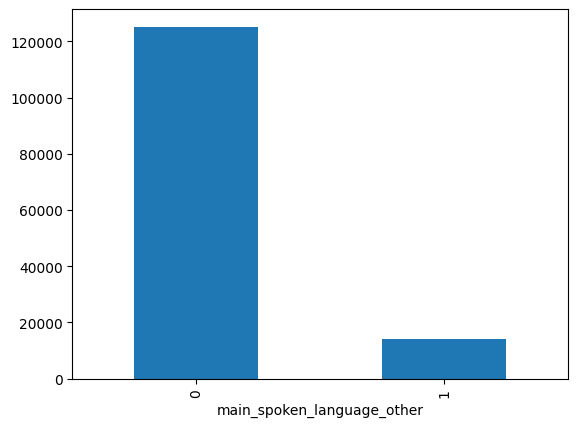

In [89]:
# Plot bar chart for main_spoken_language_other
data["main_spoken_language_other"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='smoking_unknown'>

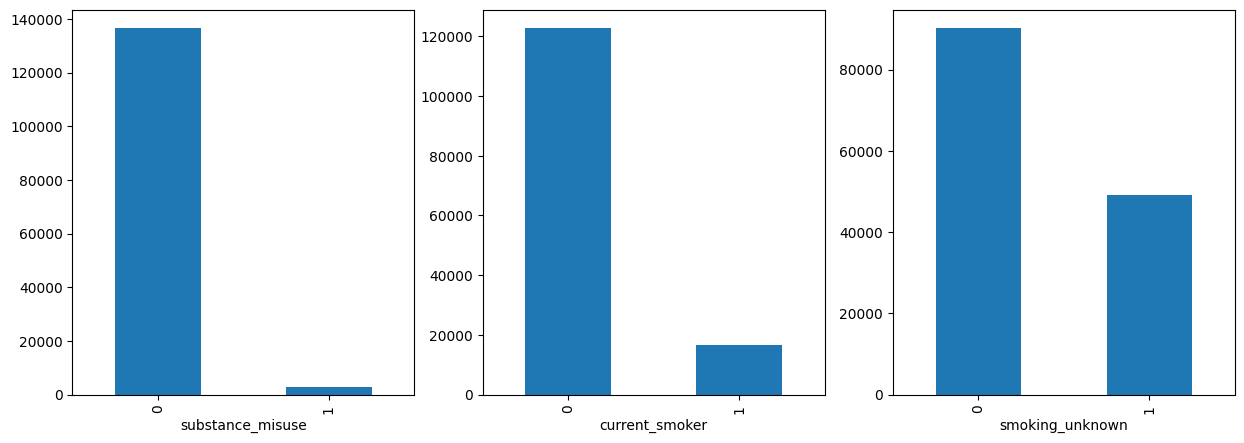

In [90]:
# Plot bar charts for substance_misuse, current_smoker and smoking_unknown
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["substance_misuse"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["current_smoker"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["smoking_unknown"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

/var/folders/0t/dc47jt692_qc1qb7bqkgylhw0000gn/T/ipykernel_65179/2207912749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["appt_month"] = pd.Categorical(data["appt_month"], categories=month_lookup, ordered=True)


<Axes: xlabel='appt_month'>

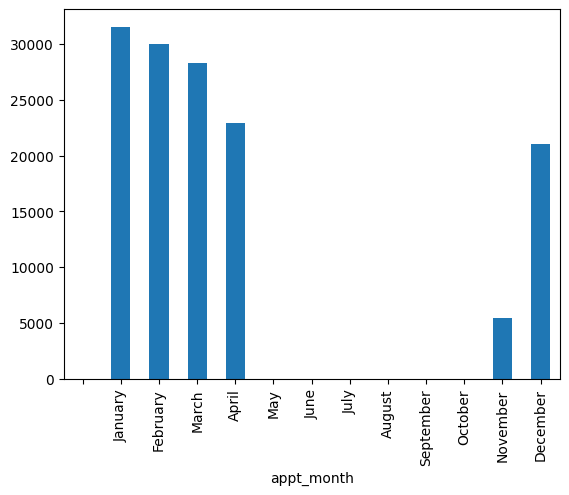

In [91]:
# Plot bar chart for appt_month
month_lookup = list(month_name)
data["appt_month"] = pd.Categorical(data["appt_month"], categories=month_lookup, ordered=True)
data["appt_month"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hospital_service_display'>

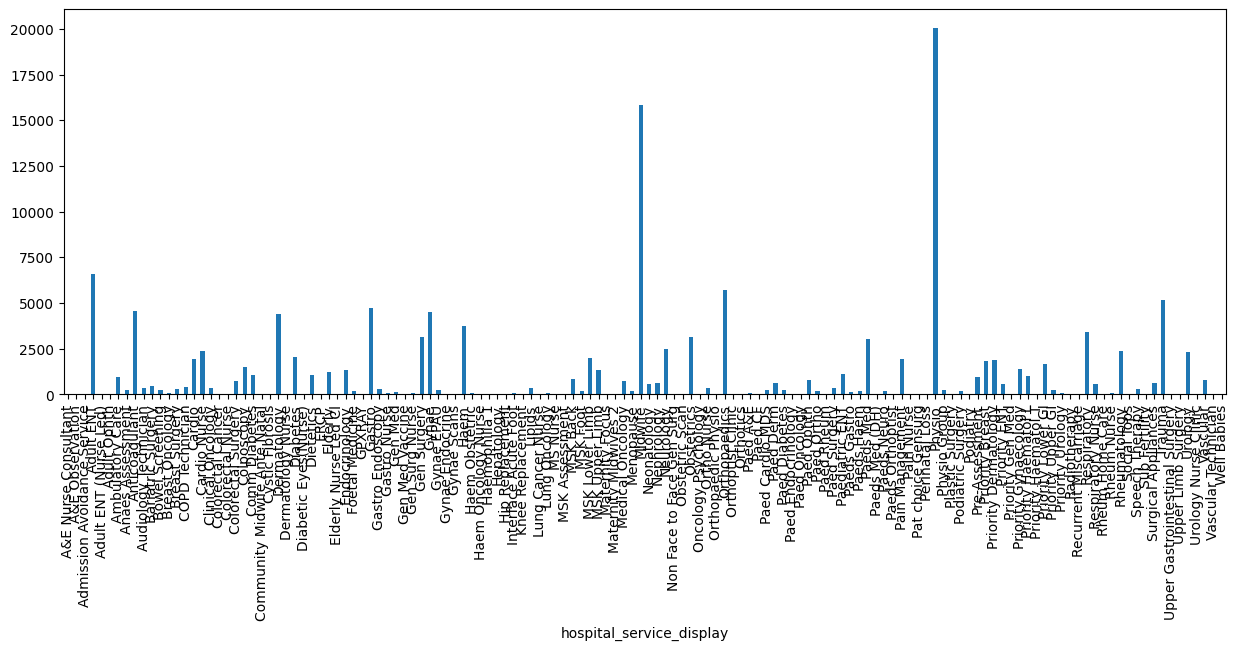

In [92]:
# Plot bar charts for hospital_service_display
plt.figure(figsize=(15, 5))
data["hospital_service_display"].value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='service_mapping'>

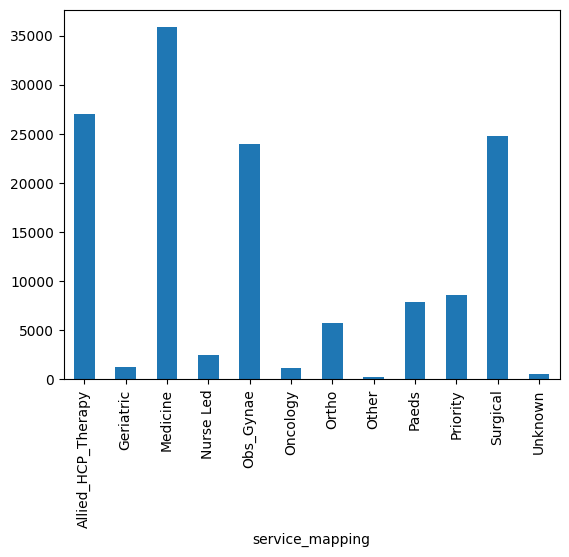

In [93]:
# Plot bar charts for service_mapping
data["service_mapping"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='reason_display'>

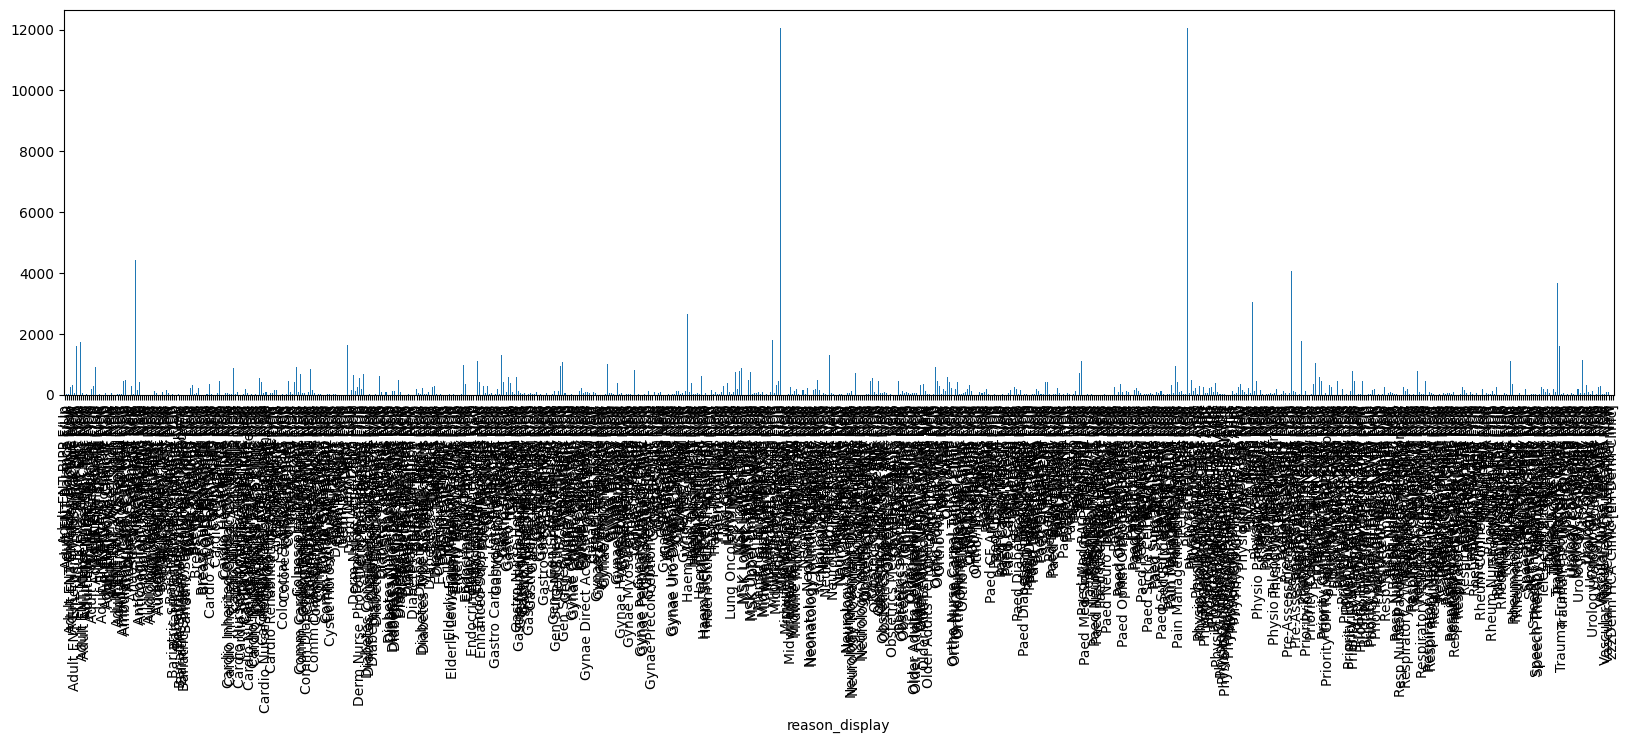

In [94]:
# Plot bar charts for reason_display
plt.figure(figsize=(20, 5))
data["reason_display"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='appointment_type'>

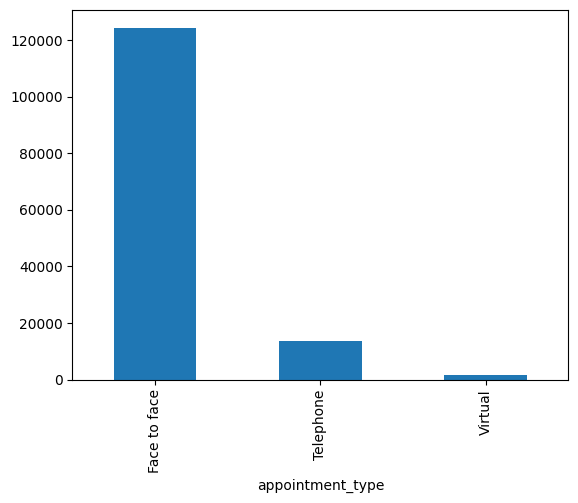

In [95]:
# Plot bar charts for appointment_type
data["appointment_type"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='new_appt_flag'>

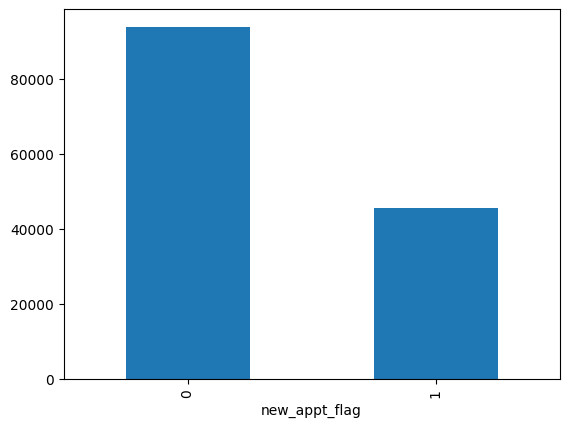

In [96]:
# Plot bar charts for new_appt_flag
data["new_appt_flag"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='appt_hour_2pm_to_3pm'>

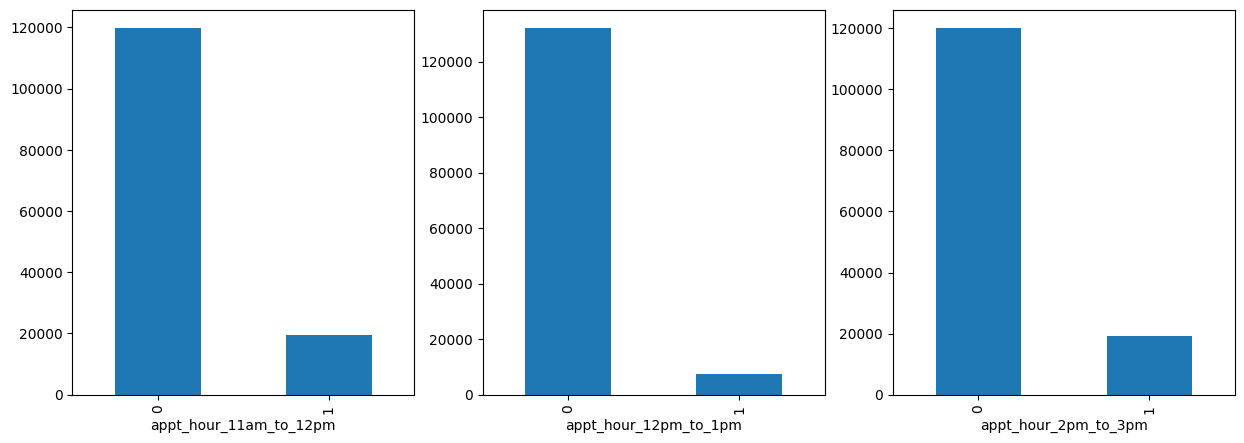

In [97]:
# Plot bar charts for apointment hours
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["appt_hour_11am_to_12pm"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["appt_hour_12pm_to_1pm"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["appt_hour_2pm_to_3pm"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='appt_season_winter'>

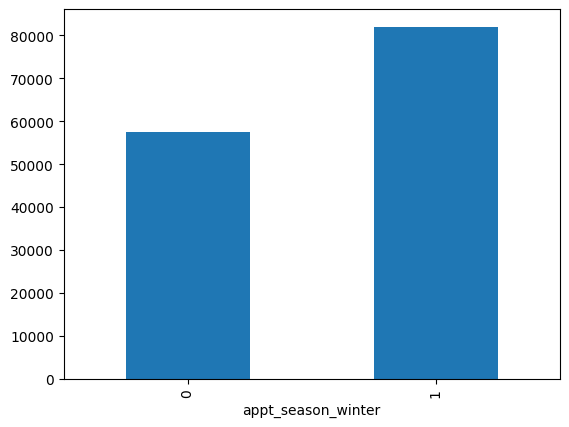

In [98]:
# Plot bar charts for appt_season_winter
data["appt_season_winter"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='emergency_enc_last_12m_three_or_more'>

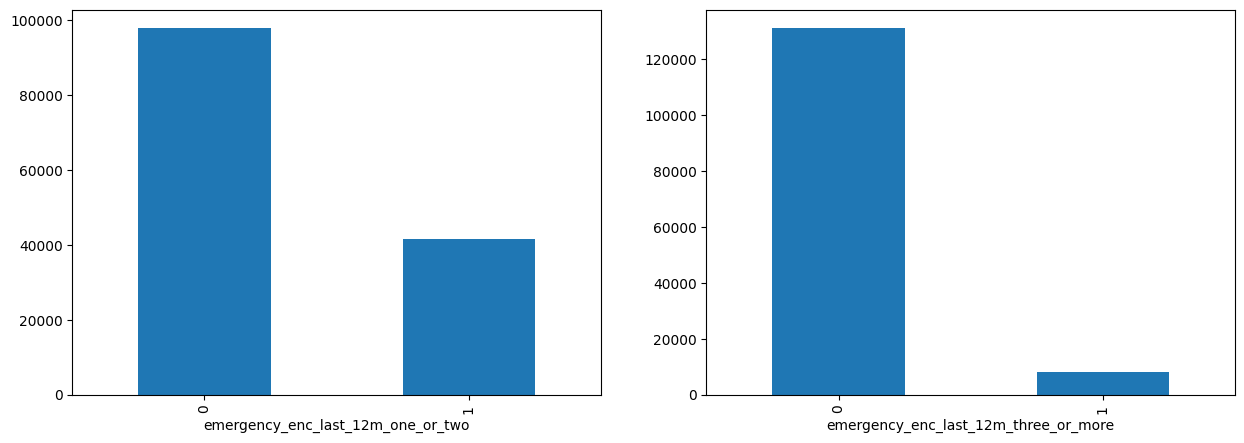

In [99]:
# Plot bar charts for emergency_enc_last_12m_one_or_two and	emergency_enc_last_12m_three_or_more
fig, axes = plt.subplots(1,2, figsize=(15, 5))
data["emergency_enc_last_12m_one_or_two"].value_counts().sort_index().plot(kind='bar', ax = axes[0])
data["emergency_enc_last_12m_three_or_more"].value_counts().sort_index().plot(kind='bar', ax = axes[1])

<Axes: xlabel='num_reschedules_two_or_more'>

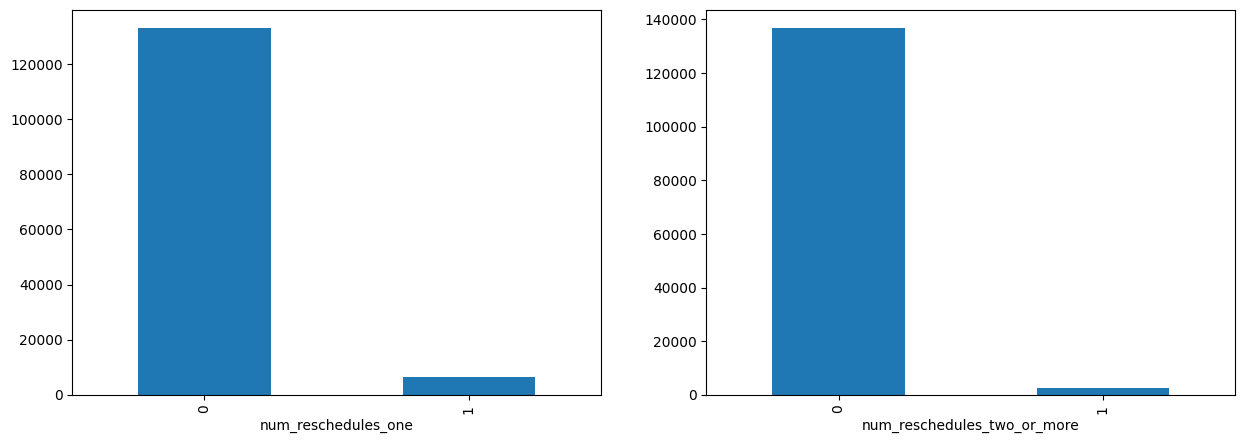

In [100]:
# Plot bar charts of # of reschedules
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data["num_reschedules_one"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["num_reschedules_two_or_more"].value_counts().sort_index().plot(kind='bar', ax=axes[1])

<Axes: xlabel='other_vulnerability'>

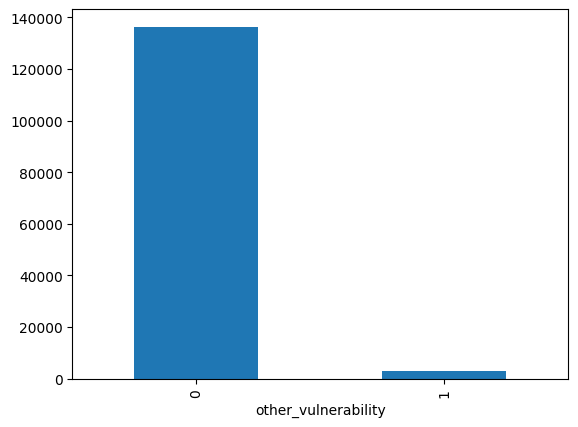

In [101]:
# Plot bar charts for other_vulnerability
data["other_vulnerability"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='past_no_show_count_three_or_more'>

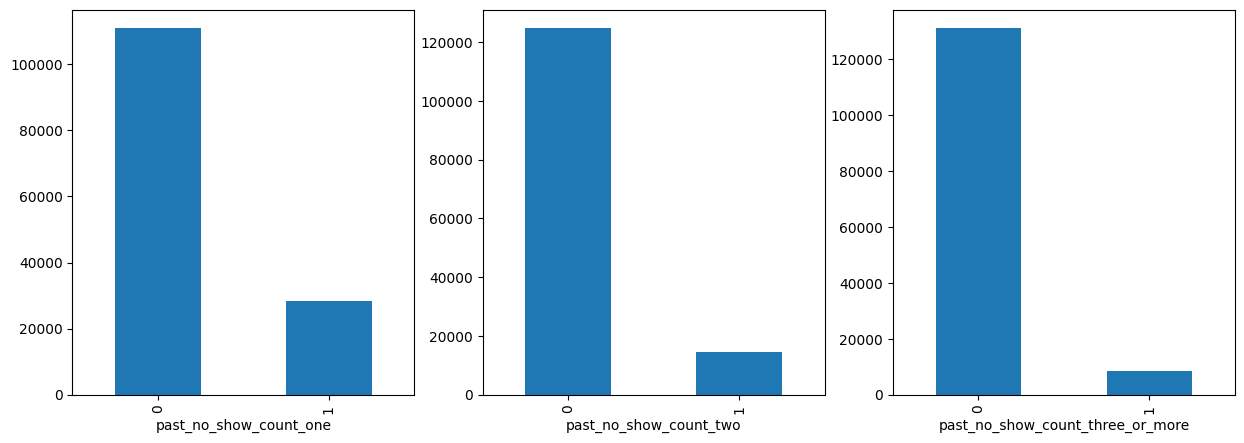

In [102]:
# Plot bar charts for past no shows
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["past_no_show_count_one"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["past_no_show_count_two"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["past_no_show_count_three_or_more"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='phone_number'>

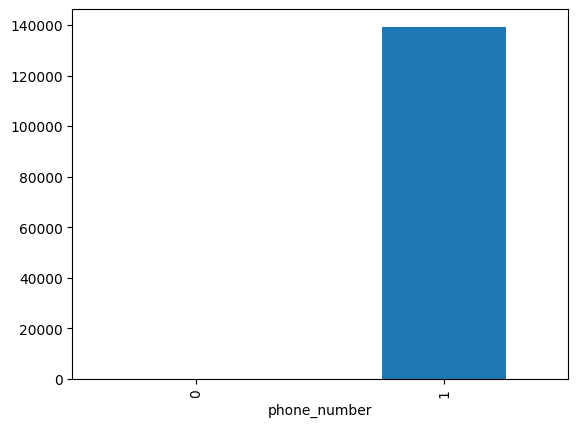

In [103]:
# Plot bar chart for phone_number
data["phone_number"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='physically_inactive'>

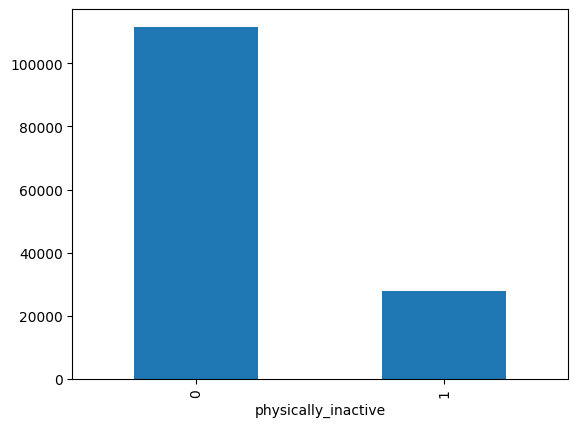

In [104]:
# Plot bar chart for physically_inactive
data["physically_inactive"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='safeguarding'>

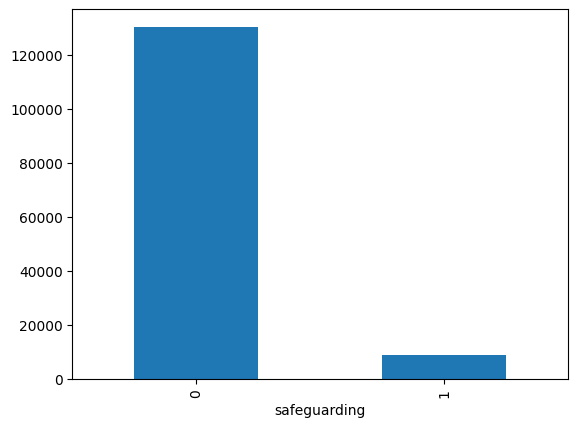

In [105]:
# Plot bar chart for safeguarding
data["safeguarding"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='service_mapping_priority'>

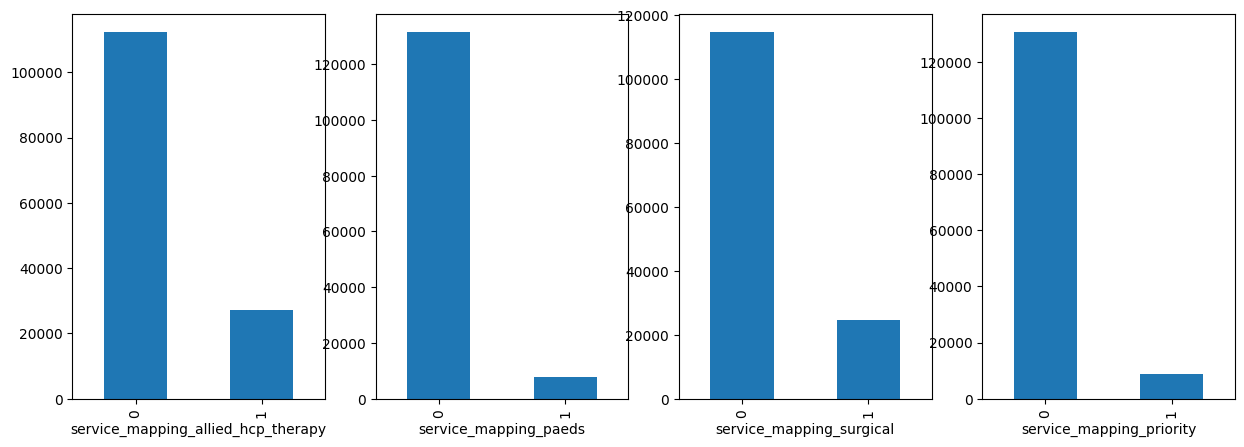

In [106]:
# Plot charts for service mappings
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

data["service_mapping_allied_hcp_therapy"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["service_mapping_paeds"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["service_mapping_surgical"].value_counts().sort_index().plot(kind='bar', ax=axes[2])
data["service_mapping_priority"].value_counts().sort_index().plot(kind='bar', ax=axes[3])

<Axes: xlabel='did_not_attend_risk_group'>

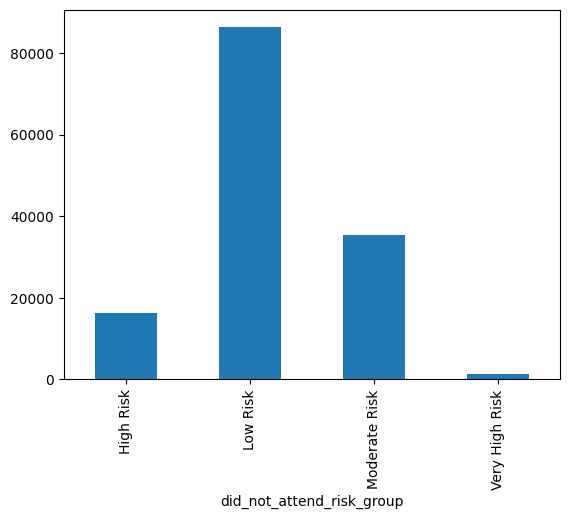

In [107]:
# Plot bar chart for did_not_attend_risk_group
data["did_not_attend_risk_group"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='no_show'>

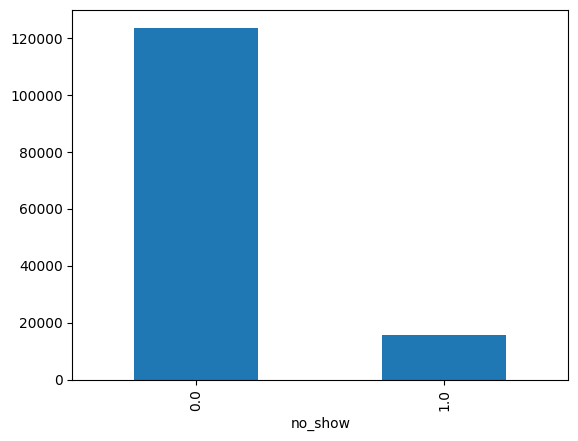

In [108]:
# Plot bar chart for no_show
data["no_show"].value_counts().sort_index().plot(kind='bar')

### Continuous variables

Text(0.5, 0, 'appt_duration')

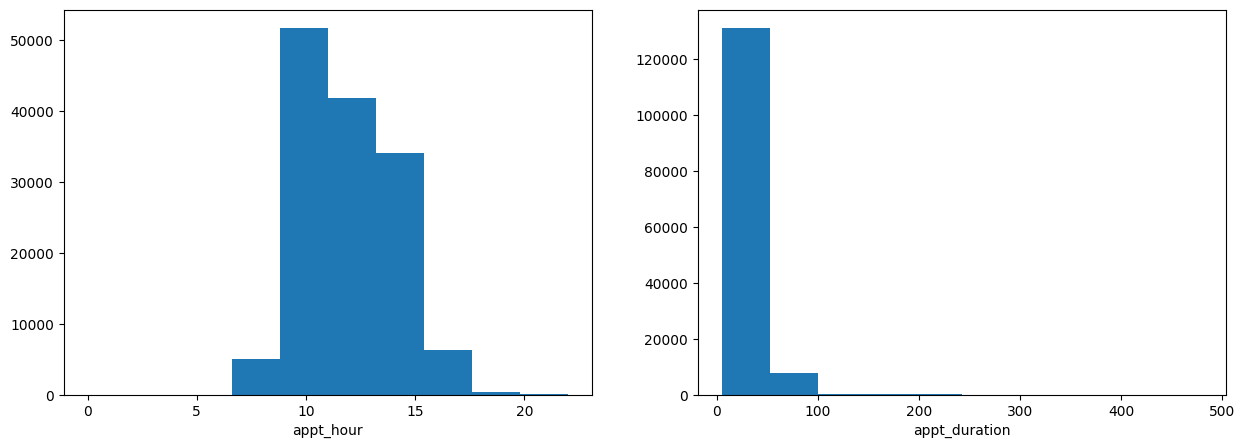

In [109]:
# Plot histograms for appt_hour and appt_duration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["appt_hour"])
axes[0].set_xlabel("appt_hour")
axes[1].hist(data["appt_duration"])
axes[1].set_xlabel("appt_duration")

Text(0.5, 0, 'lead_time')

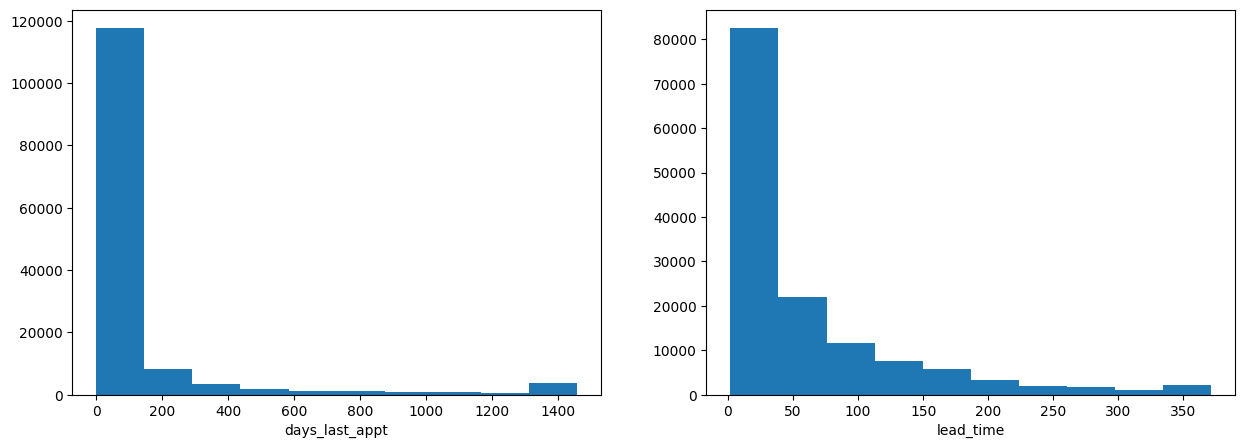

In [110]:
# Plot histograms to wait time
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["days_last_appt"])
axes[0].set_xlabel("days_last_appt")
axes[1].hist(data["lead_time"])
axes[1].set_xlabel("lead_time")

Text(0.5, 0, 'past_no_show_rate')

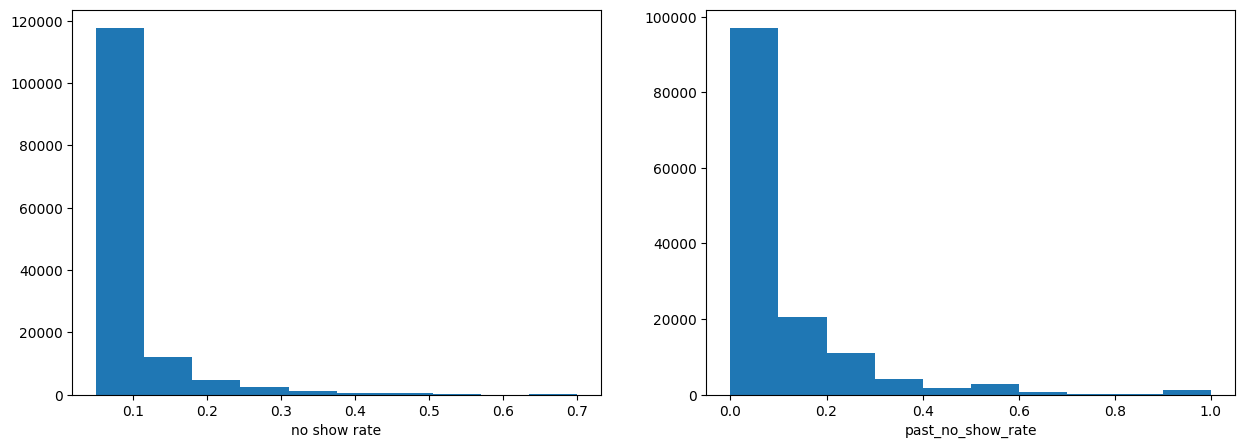

In [111]:
# Plot histograms to no show rate
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["ns_rate_seq"])
axes[0].set_xlabel("no show rate")
axes[1].hist(data["past_no_show_rate"])
axes[1].set_xlabel("past_no_show_rate")

Text(0.5, 0, 'op_appts_last_12m')

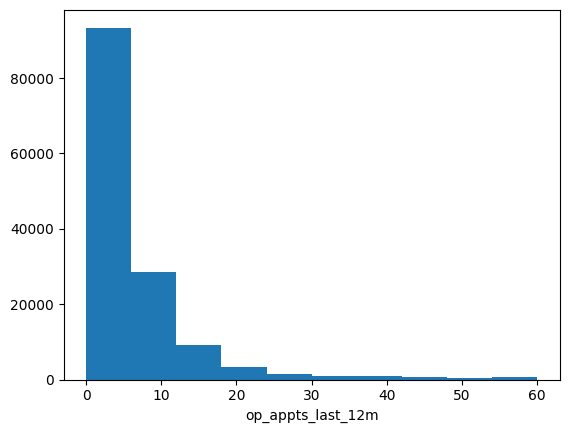

In [112]:
# Plot histogram for op_appts_last_12m
plt.hist(data["op_appts_last_12m"])
plt.xlabel("op_appts_last_12m")

Text(0.5, 0, 'osrm_drive_time')

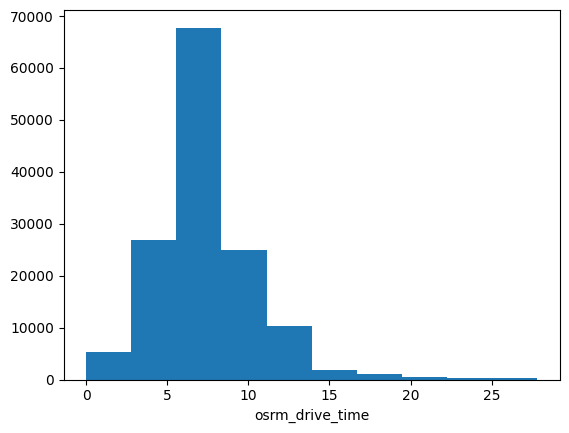

In [113]:
# Plot histogram for osrm_drive_time
plt.hist(data["osrm_drive_time"])
plt.xlabel("osrm_drive_time")

Text(0.5, 0, 'ltc_count')

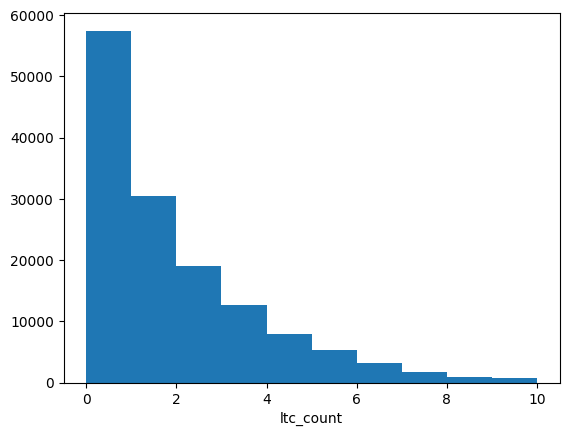

In [114]:
# Plot histogram for ltc_count
plt.hist(data["ltc_count"])
plt.xlabel("ltc_count")

Text(0.5, 0, 'did_not_attend_risk')

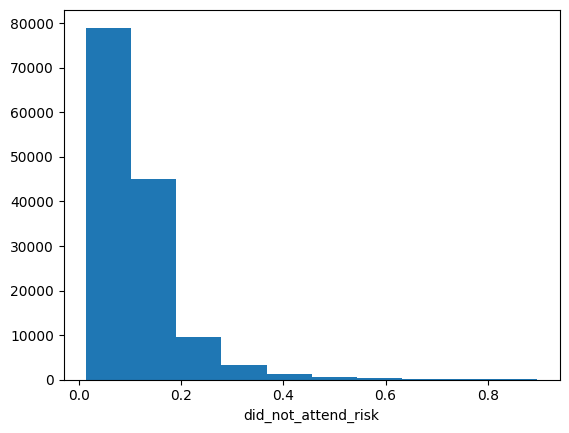

In [115]:
# Plot histogram for did_not_attend_risk
plt.hist(data["did_not_attend_risk"])
plt.xlabel("did_not_attend_risk")